___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
X_train[3].shape

(28, 28)

In [ ]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

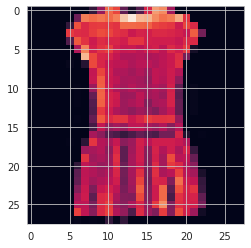

In [ ]:
plt.imshow(X_train[3])

In [ ]:
y_train[3]

3

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

Class names:

0: T-shirt/top 
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
y_train[3]

3

In [ ]:
classes[int(y_train[3])]

'Dress'

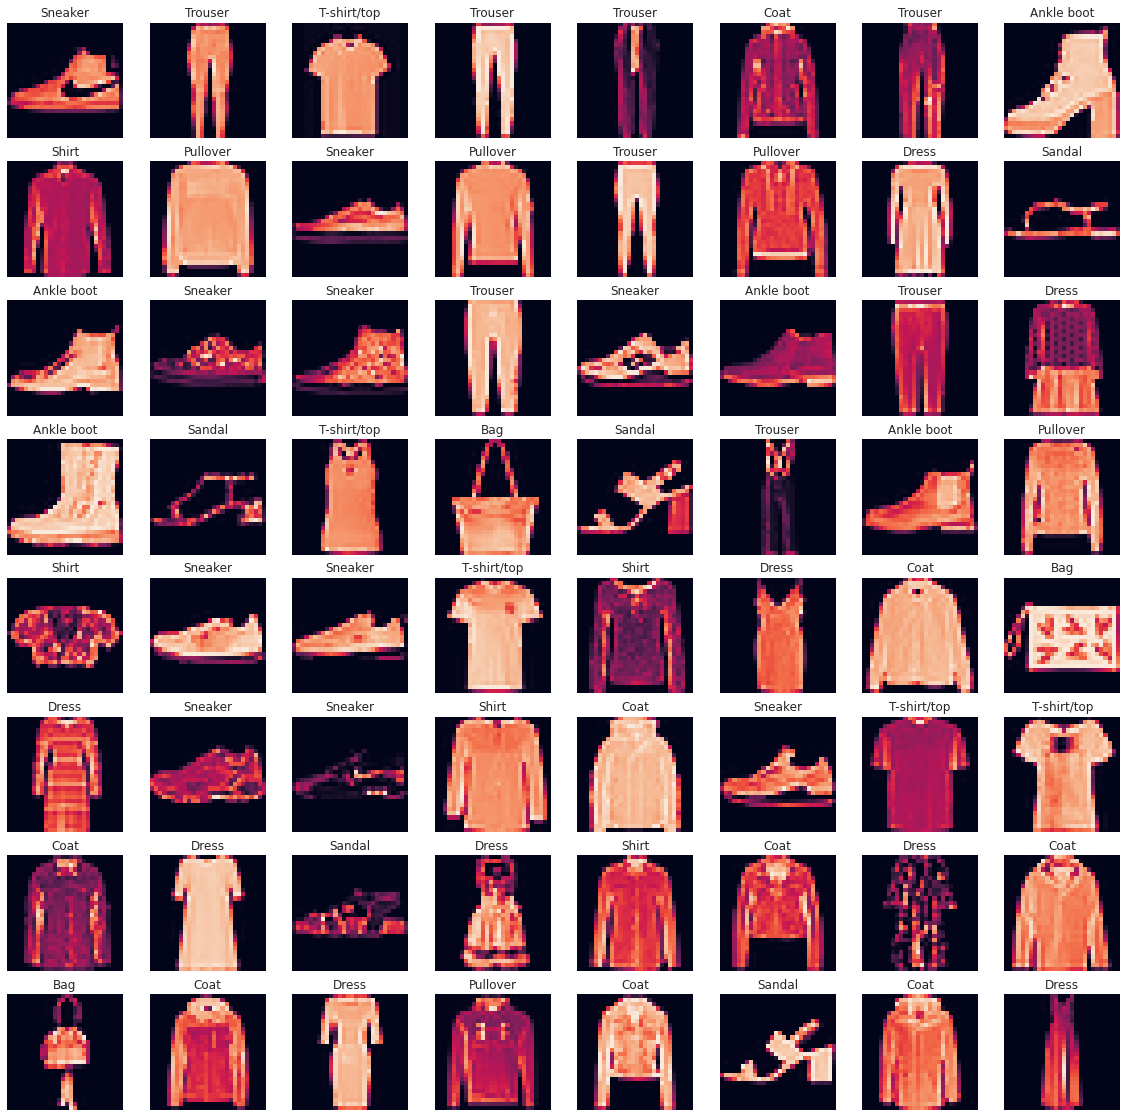

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
X_train[3].min()

0

In [ ]:
X_train[3].max()

255

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[3].min()

0.0

In [ ]:
X_train[3].max()

1.0

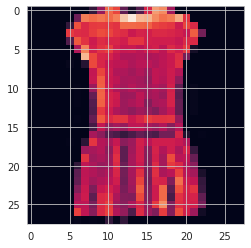

In [ ]:
plt.imshow(X_train[3])

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10)   
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [ ]:
y_train[3]

3

In [ ]:
Y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2),strides = (1,1))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3619 - accuracy: 0.8715 - val_loss: 0.2920 - val_accuracy: 0.8958
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2445 - accuracy: 0.9097 - val_loss: 0.2714 - val_accuracy: 0.9015
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1983 - accuracy: 0.9254 - val_loss: 0.2605 - val_accuracy: 0.9059
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1630 - accuracy: 0.9392 - val_loss: 0.2454 - val_accuracy: 0.9123
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1347 - accuracy: 0.9491 - val_loss: 0.2516 - val_accuracy: 0.9148
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1100 - accuracy: 0.9581 - val_loss: 0.2977 - val_accuracy: 0.9125


**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.362,0.871,0.292,0.896
1,0.244,0.910,0.271,0.901
2,0.198,0.925,0.260,0.906
3,0.163,0.939,0.245,0.912
4,0.135,0.949,0.252,0.915


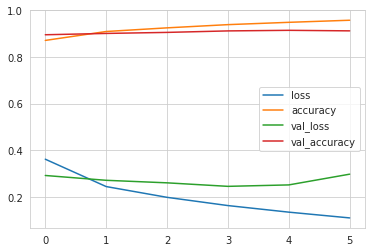

In [ ]:
summary.plot();

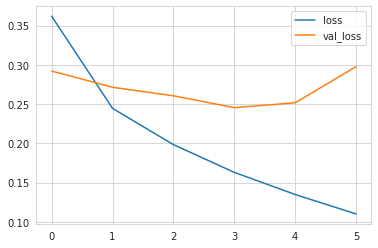

In [ ]:
summary[["loss", "val_loss"]].plot();

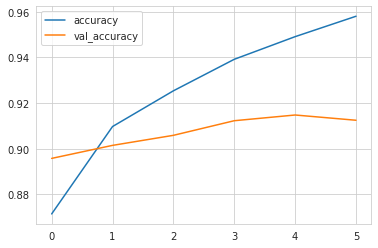

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2454 - accuracy: 0.9123


[0.24543188512325287, 0.9122999906539917]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24543188512325287
Test accuracy: 0.9122999906539917


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.88      0.84      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.74      0.75      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[894   0  10  19   3   1  70   0   3   0]
 [  0 985   0  10   2   0   2   0   1   0]
 [ 23   2 861   7  45   0  62   0   0   0]
 [ 14   6   8 927  22   0  21   0   2   0]
 [  0   1  70  26 836   0  66   0   1   0]
 [  0   0   0   0   0 978   0  11   0  11]
 [126   0  56  30  45   0 739   0   4   0]
 [  0   0   0   0   0   9   0 970   0  21]
 [  8   1   0   4   0   1  15   4 967   0]
 [  1   0   0   0   0   4   0  29   0 966]]


### Modelling-2

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2),strides = (1,1))) 
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 25, 28)        0         
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4697 - accuracy: 0.8343 - val_loss: 0.3249 - val_accuracy: 0.8839
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3329 - accuracy: 0.8808 - val_loss: 0.2924 - val_accuracy: 0.8927
Epoch 3/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2973 - accuracy: 0.8922 - val_loss: 0.2813 - val_accuracy: 0.8967
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2721 - accuracy: 0.8999 - val_loss: 0.2736 - val_accuracy: 0.9008
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2554 - accuracy: 0.9055 - val_loss: 0.2619 - val_accuracy: 0.9052
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2376 - accuracy: 0.9115 - val_loss: 0.2513 - val_accuracy: 0.9113
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2258 - accuracy: 0.9169 - val_loss: 0.2598 - val_accuracy:

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.470,0.834,0.325,0.884
1,0.333,0.881,0.292,0.893
2,0.297,0.892,0.281,0.897
3,0.272,0.900,0.274,0.901
4,0.255,0.905,0.262,0.905


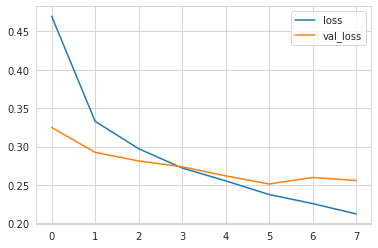

In [ ]:
summary[["loss", "val_loss"]].plot();

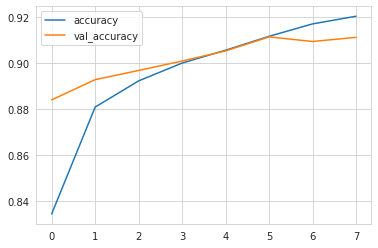

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.9113


[0.2512718141078949, 0.911300003528595]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2512718141078949
Test accuracy: 0.911300003528595


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       1.00      0.97      0.99      1000
           2       0.84      0.86      0.85      1000
           3       0.89      0.94      0.91      1000
           4       0.83      0.88      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.69      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



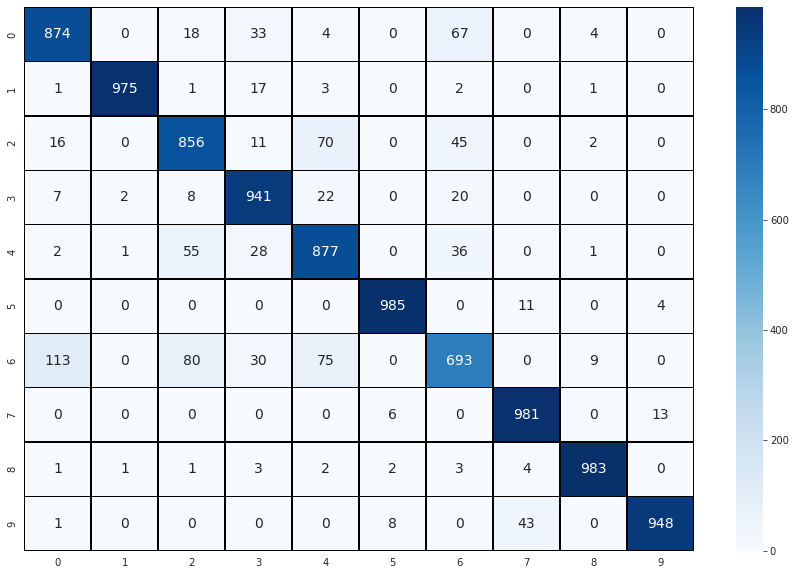

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Modelling-3




In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2),strides = (1,1))) 
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 28)       112       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 25, 25, 28)        0         
                                                                 
 flatten_2 (Flatten)         (None, 17500)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4369 - accuracy: 0.8461 - val_loss: 0.3037 - val_accuracy: 0.8864
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3141 - accuracy: 0.8876 - val_loss: 0.2833 - val_accuracy: 0.8951
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2781 - accuracy: 0.8993 - val_loss: 0.2602 - val_accuracy: 0.9025
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2559 - accuracy: 0.9059 - val_loss: 0.2648 - val_accuracy: 0.8990
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2403 - accuracy: 0.9120 - val_loss: 0.2573 - val_accuracy: 0.9059
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2273 - accuracy: 0.9163 - val_loss: 0.2565 - val_accuracy: 0.9078
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2118 - accuracy: 0.9220 - val_loss: 0.2583 - val_accuracy:

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.437,0.846,0.304,0.886
1,0.314,0.888,0.283,0.895
2,0.278,0.899,0.260,0.902
3,0.256,0.906,0.265,0.899
4,0.240,0.912,0.257,0.906


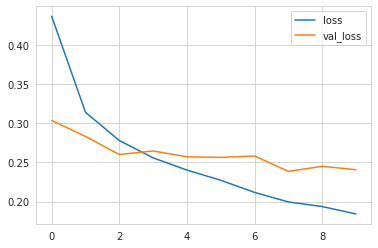

In [ ]:
summary[["loss", "val_loss"]].plot();

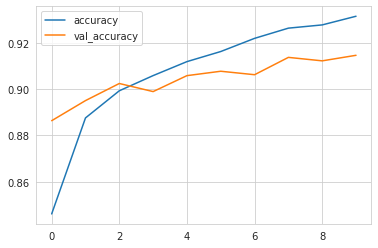

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2386 - accuracy: 0.9138


[0.23862363398075104, 0.9138000011444092]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23862363398075104
Test accuracy: 0.9138000011444092


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.90      0.86      1000
           3       0.90      0.93      0.92      1000
           4       0.90      0.81      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.78      0.73      0.75      1000
           7       0.97      0.95      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



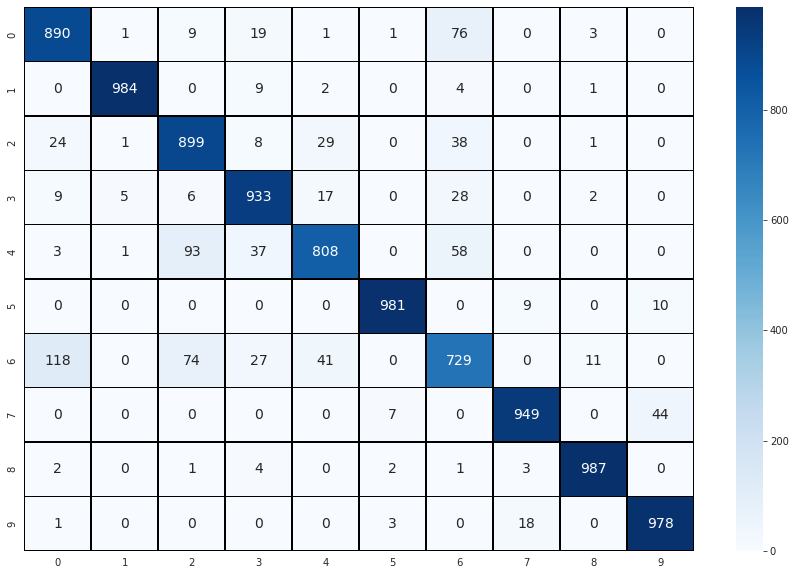

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [ ]:
my_image = X_test[3]

In [ ]:
my_image.shape

(28, 28, 1)

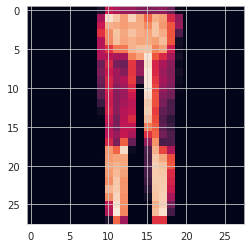

In [ ]:
plt.imshow(my_image.reshape(28,28));

In [ ]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [ ]:
image_prediction

array([[3.1366301e-10, 9.9999988e-01, 7.0122437e-09, 2.1577449e-08,
        1.7711114e-08, 4.4487876e-08, 3.3007008e-09, 1.4482096e-09,
        5.4286557e-09, 1.1044160e-09]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([1])

In [ ]:
result=np.argmax(image_prediction, axis=1)
result

array([1])

In [ ]:
classes[int(result)]

'Trouser'

In [ ]:
model.save("cnn-assign-2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___